# Vehicle Classification by Silhouette using PCA and SVC

## Context:
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

## Attribute Information:

● All the features are geometric features extracted from the silhouette.  

● All are numeric in nature.

## Learning Outcomes: 
● Exploratory Data Analysis

● Reduce number dimensions in the dataset with minimal information loss

● Train a model using Principle Components

## Objective: 

Apply dimensionality reduction technique –PCA and train a model using principle components instead of training the model using just the raw data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) 

#Predictive Modeling
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn import metrics

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV
# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve

In [2]:
df=pd.read_csv("D:\\PGP AIML\\Unsupervised Learning\\vehicle.csv")

In [3]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
df.shape

(846, 19)

In [6]:
df.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

## Explanatory Data Analysis

In [7]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [8]:
# Checking missing values in dataframe
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
df['class'].value_counts(normalize=True)*100

car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64

In [10]:
replace_struc = {'car': 3, 'bus': 2, 'van': 1}
df['class'] = df['class'].map(replace_struc)
del replace_struc

In [11]:
df['class'].value_counts(normalize=True)*100

3    50.709220
2    25.768322
1    23.522459
Name: class, dtype: float64

In [12]:
null_columns = df.columns[df.isnull().any()]; columns = list(df.columns)

print('Descriptive Stats for columns with missing values before imputation : \n', '--'*30)
display(df[null_columns].describe().T)

# Using SimpleImputer to fill missing values by mean
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean', verbose = 1)
df = pd.DataFrame(impute.fit_transform(df), columns = columns)

print('Descriptive Stats after imputation: \n', '--'*30)
display(df[null_columns].describe().T)

del null_columns

Descriptive Stats for columns with missing values before imputation : 
 ------------------------------------------------------------


count        mean         std    min    25%  \
circularity                  841.0   44.828775    6.152172   33.0   40.0   
distance_circularity         842.0   82.110451   15.778292   40.0   70.0   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.0   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.0   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.0   
elongatedness                845.0   40.933728    7.816186   26.0   33.0   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.0   
scaled_variance              843.0  188.631079   31.411004  130.0  167.0   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.0   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.0   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.0   
skewness_about               840.0    6.364286    4.920649    0.0    2.0   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.0   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.0   

                               50%    75%     max  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0

Descriptive Stats after imputation: 
 ------------------------------------------------------------


count        mean         std    min     25%  \
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.888095   33.400979  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.678910    7.882119   47.0   57.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
scaled_variance              846.0  188.631079   31.355195  130.0  167.00   
scaled_variance.1            846.0  439.494076  176.457706  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.447743    7.468450   59.0   67.00   
skewness_about               846.0    6.364286    4.903148    0.0    2.00   
skewness_about.1             846.0   12.602367    8.930792    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   

                               50%     75%     max  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 168.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration.1   72.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0

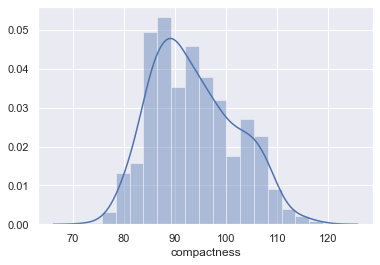

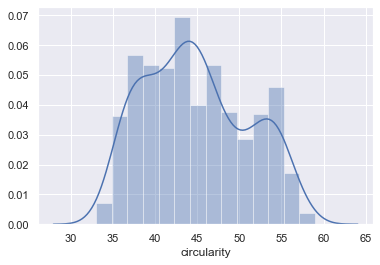

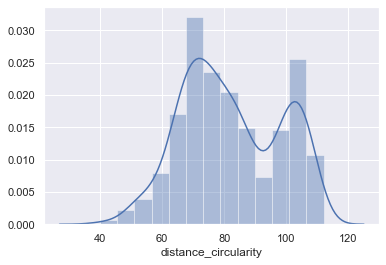

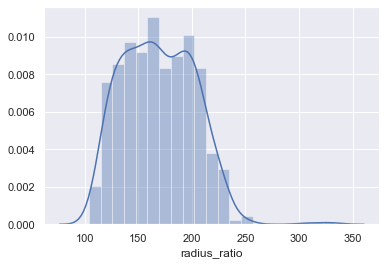

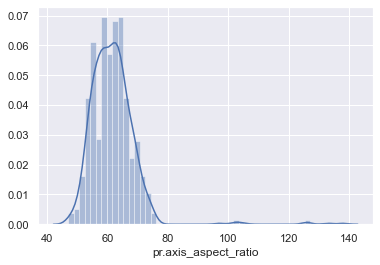

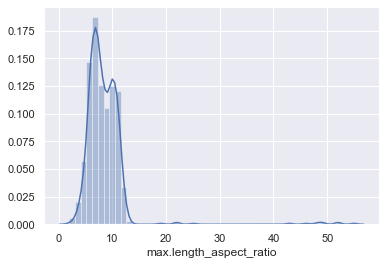

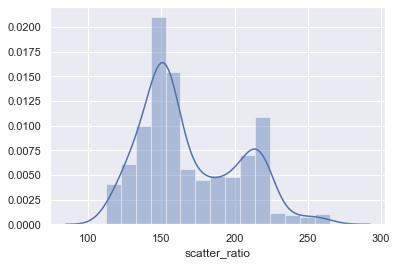

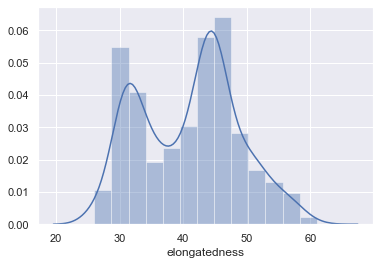

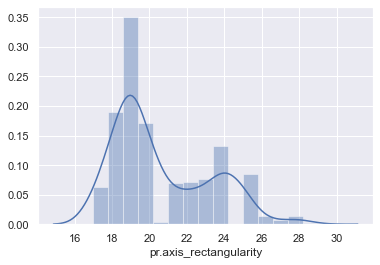

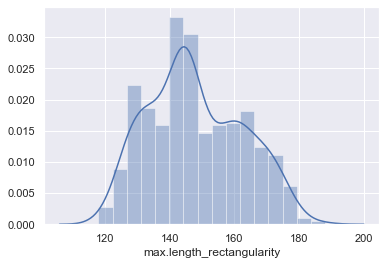

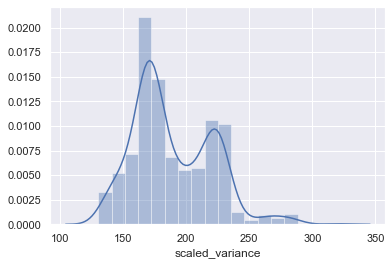

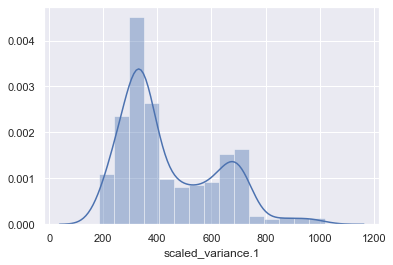

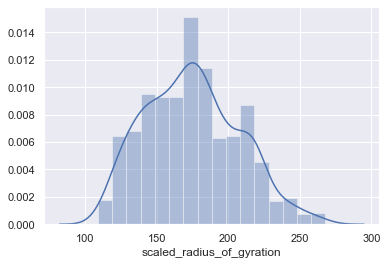

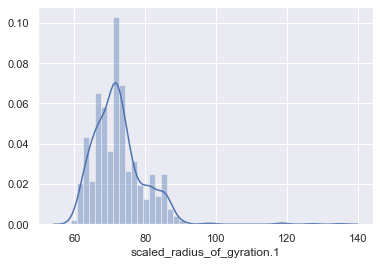

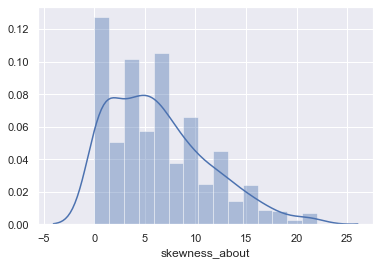

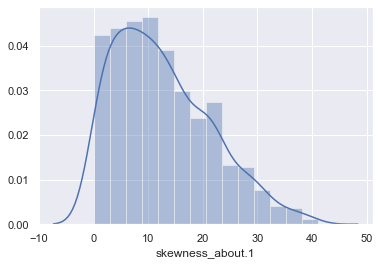

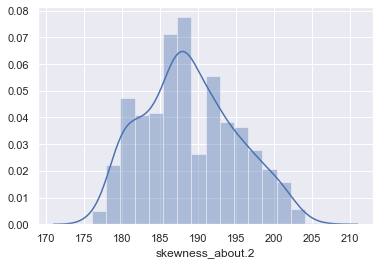

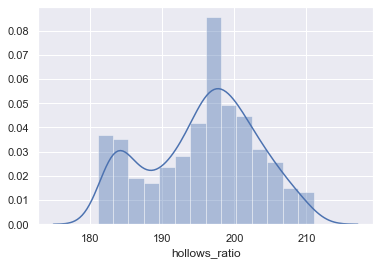

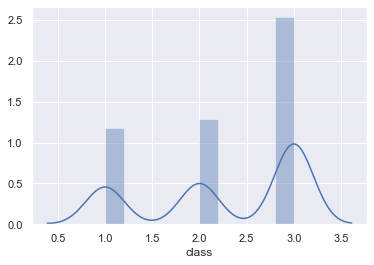

In [13]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

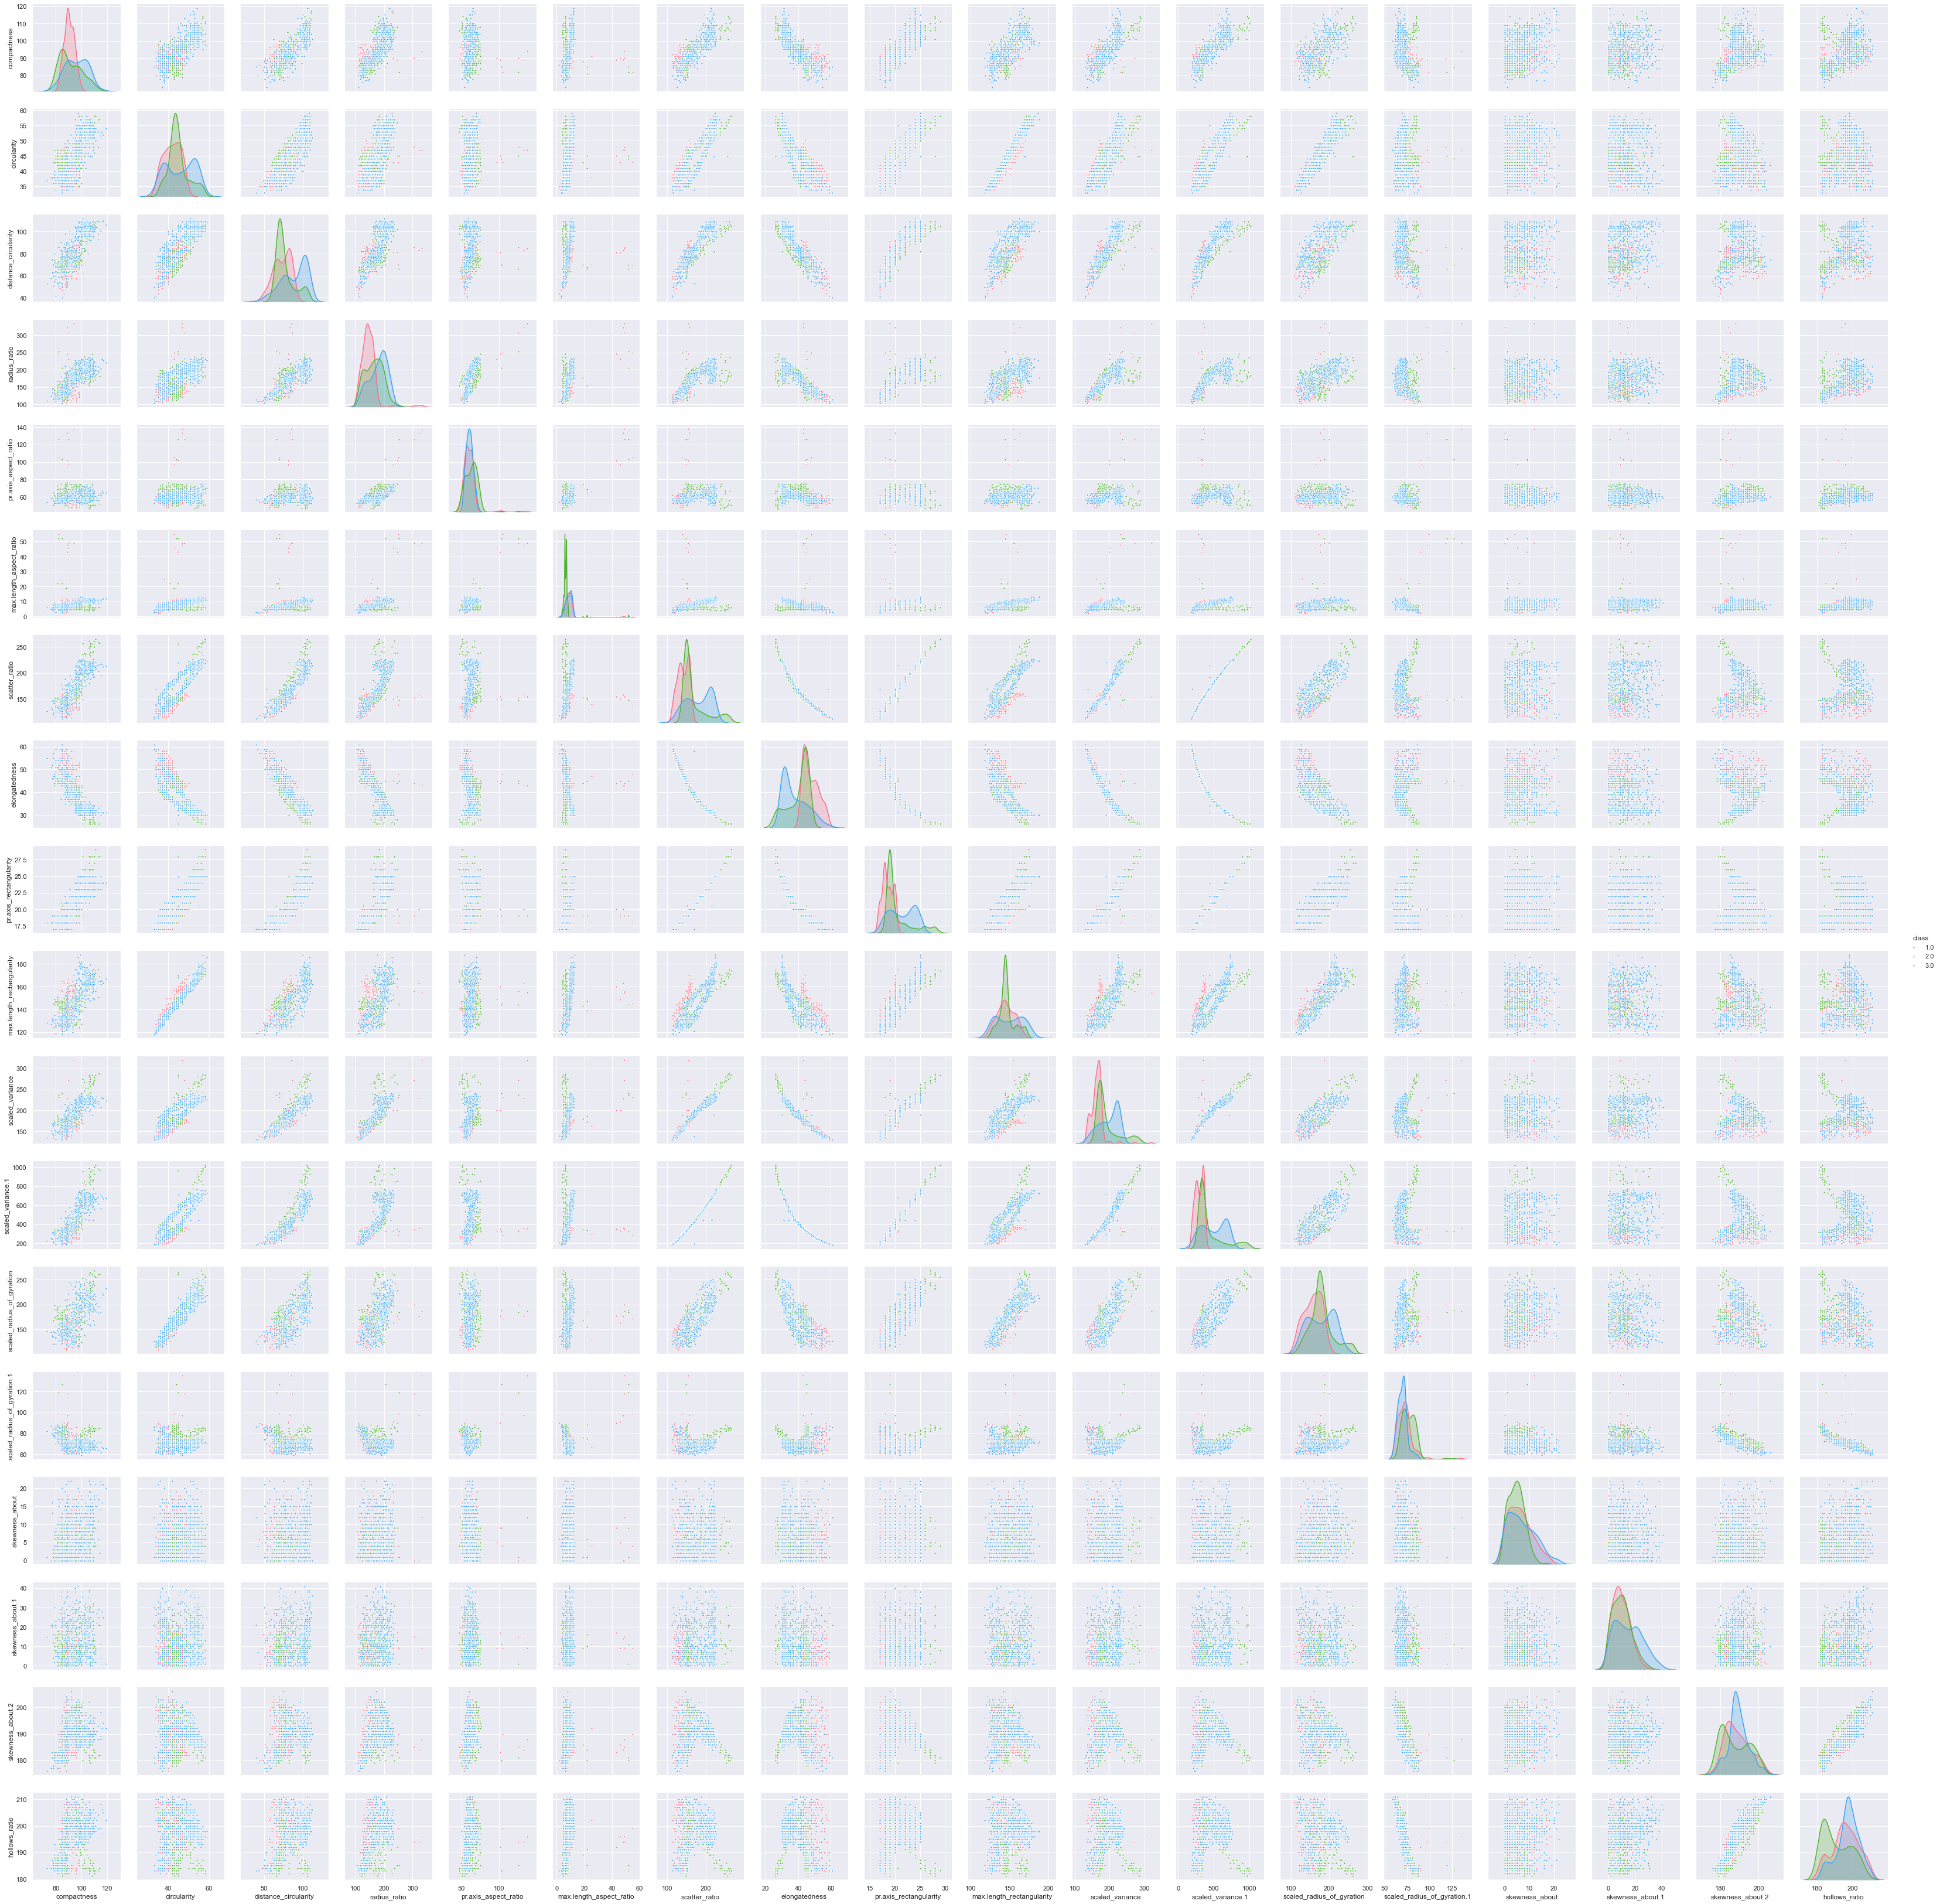

In [14]:
# Pairwise relationship of numerical features in each of the category of status
sns.pairplot(df, hue='class', diag_kind='kde', palette='husl', markers='.')

In [15]:
# Functions that will help us with EDA plot
from scipy.stats import  norm
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'{col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'{col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

Radius_ratio column --------------------------------------------------------------------------------


3

compactness  circularity  distance_circularity  radius_ratio  \
37          90.0         48.0                  86.0         306.0   
135         89.0         47.0                  83.0         322.0   
388         94.0         47.0                  85.0         333.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                  126.0                     49.0          153.0   
135                 133.0                     48.0          158.0   
388                 138.0                     49.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                      156.0   
135           43.0                    20.0                      163.0   
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
37              185.0          194.0    1.0  
135             184.0          194.0    1.0  
388             188.0          196.0    1.0

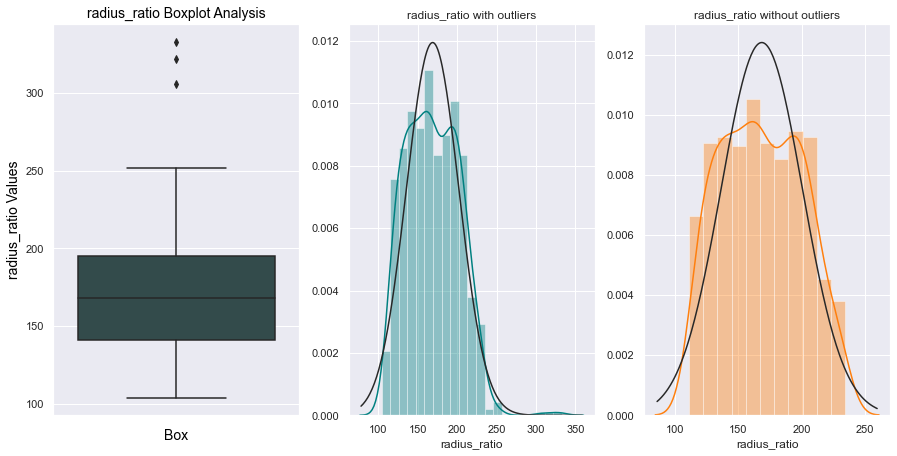

Pr.axis_aspect_ratio column --------------------------------------------------------------------------------


8

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         306.0   
100         82.0         45.0                  66.0         252.0   
135         89.0         47.0                  83.0         322.0   
291         89.0         45.0                  81.0         246.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                     52.0          149.0   
37                  126.0                     49.0          153.0   
100                 126.0                     52.0          148.0   
135                 133.0                     48.0          158.0   
291                 102.0                     43.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
37            44.0                    19.0                      156.0   
100           45.0                    19.0                      144.0   
135           43.0                    20.0                      163.0   
291           44.0                    20.0                      160.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
100                        119.0             1.0               1.0   
135                         97.0             0.0              14.0   
291                         90.0             9.0              17.0   

     skewness_about.2  hollows_ratio  class  
4               180.0          183.0    2.0  
37              185.0          194.0    1.0  
100             181.0          185.0    2.0  
135             184.0          194.0    1.0  
291             183.0          192.0    1.0

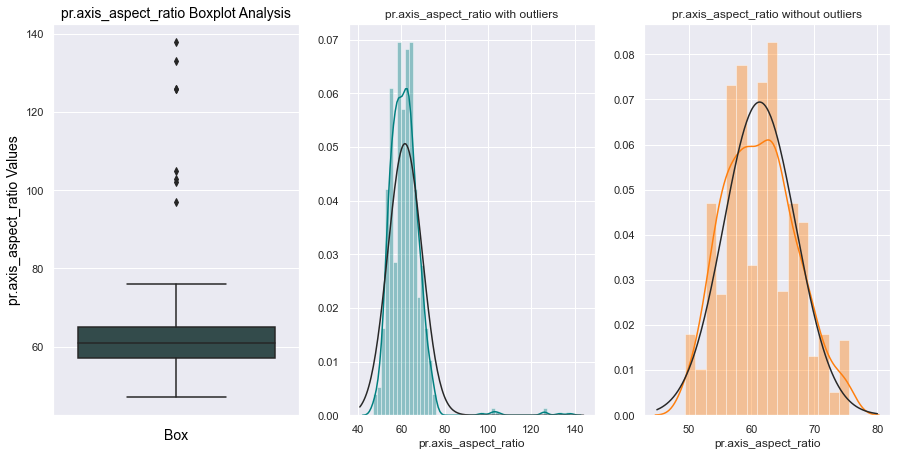

Max.length_aspect_ratio column --------------------------------------------------------------------------------


13

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         306.0   
100         82.0         45.0                  66.0         252.0   
127         85.0         41.0                  66.0         155.0   
135         89.0         47.0                  83.0         322.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                     52.0          149.0   
37                  126.0                     49.0          153.0   
100                 126.0                     52.0          148.0   
127                  65.0                     22.0          149.0   
135                 133.0                     48.0          158.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
37            44.0                    19.0                      156.0   
100           45.0                    19.0                      144.0   
127           45.0                    19.0                      139.0   
135           43.0                    20.0                      163.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
127            173.0              330.0                      155.0   
135            229.0              364.0                      176.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
100                        119.0             1.0               1.0   
127                         75.0             6.0              16.0   
135                         97.0             0.0              14.0   

     skewness_about.2  hollows_ratio  class  
4               180.0          183.0    2.0  
37              185.0          194.0    1.0  
100             181.0          185.0    2.0  
127             184.0          191.0    2.0  
135             184.0          194.0    1.0

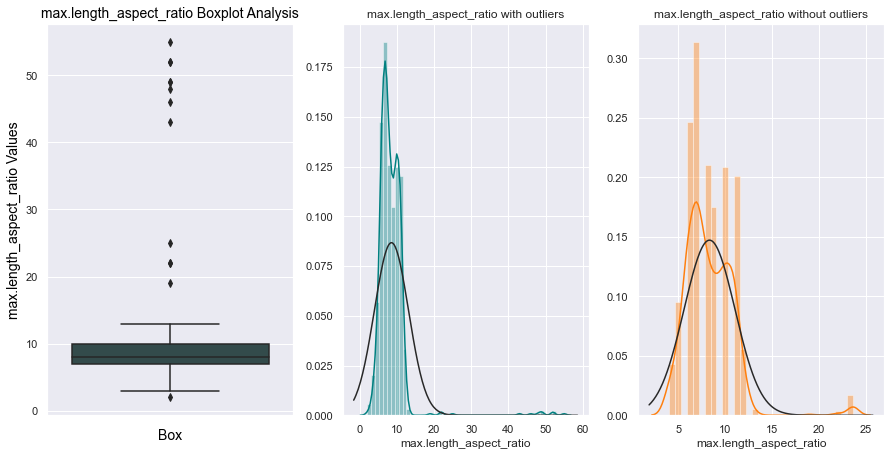

Scaled_variance.1 column --------------------------------------------------------------------------------


2

compactness  circularity  distance_circularity  radius_ratio  \
85         110.0         58.0                 106.0         180.0   
835        111.0         58.0                 105.0         183.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
85                   51.0                      6.0          261.0   
835                  51.0                      6.0          265.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
85            26.0                    28.0                      171.0   
835           26.0                    29.0                      174.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
85             278.0              998.0                      257.0   
835            285.0             1018.0                      255.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
85                          83.0             9.0              13.0   
835                         85.0             4.0               8.0   

     skewness_about.2  hollows_ratio  class  
85              181.0          182.0    2.0  
835             181.0          183.0    2.0

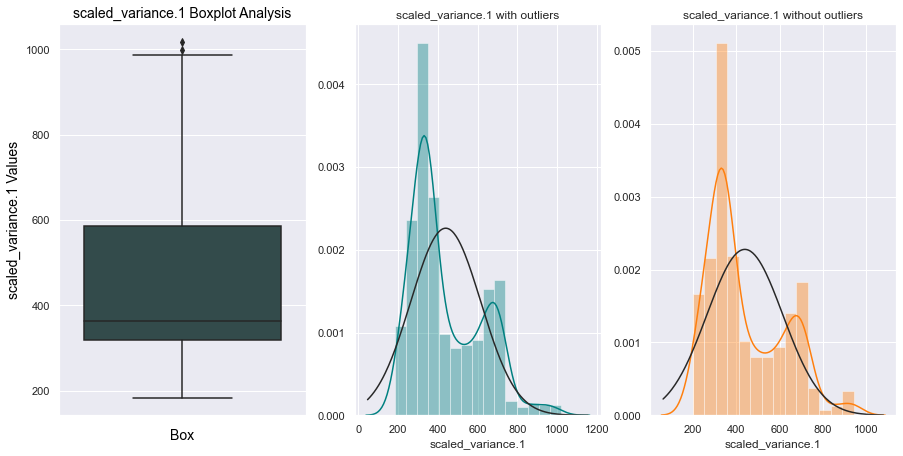

Scaled_radius_of_gyration.1 column --------------------------------------------------------------------------------


15

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         306.0   
47          85.0         42.0                  66.0         122.0   
79          89.0         44.0                  68.0         113.0   
100         82.0         45.0                  66.0         252.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                     52.0          149.0   
37                  126.0                     49.0          153.0   
47                   54.0                      6.0          148.0   
79                   50.0                      7.0          150.0   
100                 126.0                     52.0          148.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
37            44.0                    19.0                      156.0   
47            46.0                    19.0                      141.0   
79            45.0                    19.0                      147.0   
100           45.0                    19.0                      144.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
47             172.0              317.0                      174.0   
79             171.0              328.0                      189.0   
100            237.0              326.0                      185.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
47                          88.0             6.0              14.0   
79                          88.0             6.0               5.0   
100                        119.0             1.0               1.0   

     skewness_about.2  hollows_ratio  class  
4               180.0          183.0    2.0  
37              185.0          194.0    1.0  
47              180.0          182.0    2.0  
79              179.0          182.0    2.0  
100             181.0          185.0    2.0

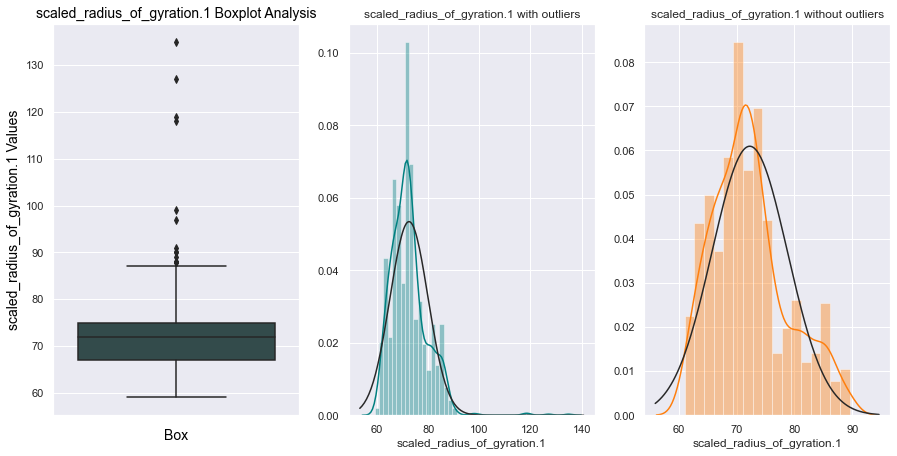

Skewness_about column --------------------------------------------------------------------------------


12

compactness  circularity  distance_circularity  radius_ratio  \
44         119.0         54.0                 106.0         220.0   
113         88.0         35.0                  50.0         121.0   
123         90.0         36.0                  57.0         130.0   
190         97.0         48.0                  94.0         198.0   
346        117.0         52.0                 110.0         228.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
44                   65.0                     12.0          213.0   
113                  58.0                      5.0          114.0   
123                  57.0                      6.0          121.0   
190                  63.0                      9.0          181.0   
346                  65.0                     12.0          212.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
44            31.0                    24.0                      167.0   
113           59.0                    17.0                      122.0   
123           56.0                    17.0                      127.0   
190           36.0                    21.0                      155.0   
346           31.0                    24.0                      163.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
44             223.0              675.0                      232.0   
113            132.0              192.0                      138.0   
123            137.0              216.0                      132.0   
190            200.0              494.0                      189.0   
346            228.0              668.0                      220.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
44                          66.0            20.0               1.0   
113                         74.0            21.0               4.0   
123                         68.0            22.0              23.0   
190                         64.0            20.0              11.0   
346                         66.0            21.0              25.0   

     skewness_about.2  hollows_ratio  class  
44              192.0          202.0    3.0  
113             182.0          187.0    3.0  
123             190.0          195.0    3.0  
190             199.0          203.0    3.0  
346             194.0          205.0    3.0

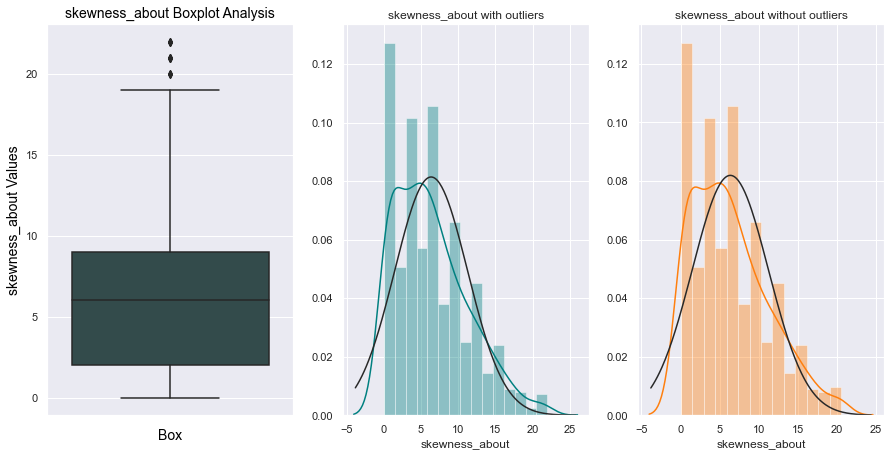

Skewness_about.1 column --------------------------------------------------------------------------------


1

compactness  circularity  distance_circularity  radius_ratio  \
132         97.0         42.0                 101.0         186.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
132                  59.0                      9.0          186.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
132           36.0                    22.0                      138.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
132            208.0              511.0                      168.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
132                         67.0             7.0              41.0   

     skewness_about.2  hollows_ratio  class  
132             194.0          206.0    3.0

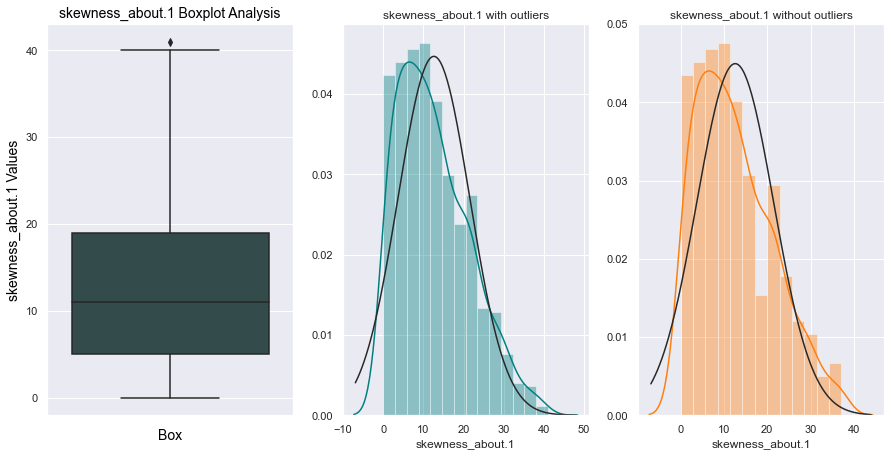

Scaled_variance column --------------------------------------------------------------------------------


1

compactness  circularity  distance_circularity  radius_ratio  \
388         94.0         47.0                  85.0         333.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
388                 138.0                     49.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
388             188.0          196.0    1.0

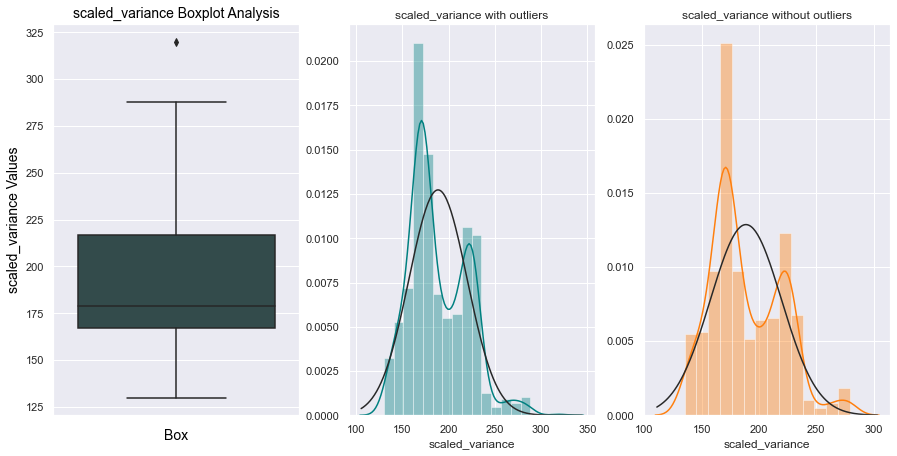

In [16]:
# Outlier, distribution for columns with outliers
boxplotcolumns = ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio',  'scaled_variance.1',
                  'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1','scaled_variance']
for cols in boxplotcolumns:
    Q3 = df[cols].quantile(0.75)
    Q1 = df[cols].quantile(0.25)
    IQR = Q3 - Q1

    print(f'{cols.capitalize()} column', '--'*40)
    display(len(df.loc[(df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))]), 
            df.loc[(df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))].head())
    odp_plots(df, cols)

del cols, IQR, boxplotcolumns

In [17]:
def plot_corr(df, size=11):
    corr = df.corr()
    corr=np.round(corr,decimals=1)
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, annot=True)
    ax.grid(False)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

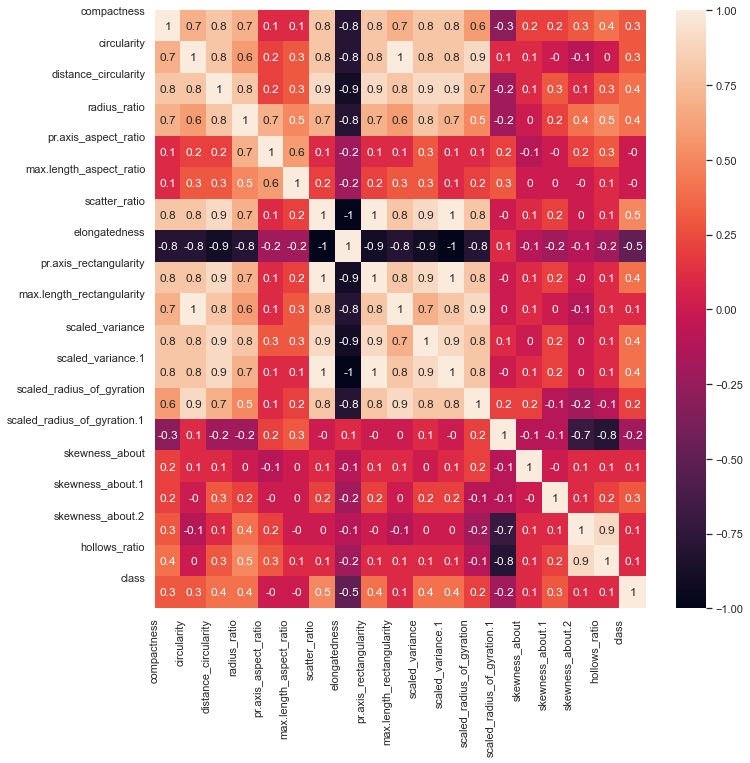

In [18]:
plot_corr(df)

### Observations from Correlation matrix
1. scatter_ratio and pr.axis_rectangularity; scaled_variance.1 and scatter_ratio; pr.axis_rectangularity and scaled_variance.1; pr.axis_rectangularity and scaled_variance.1; elongatedness and scatter_ratio; circularity and max.length_rectangularity; scaled_variance and scatter_ratio; elongatedness and pr.axis_rectangularity; elongatedness and scaled_variance.1; elongatedness and scaled_variance; pr.axis_rectangularity, scaled_variance and scaled_variance.1; distance_circularity and elongatedness; circularity and scaled_radius_of_gyration; distance_circularity and elongatedness; scatter_ratio and distance_circularity are correlated with each other with a correlation coeff greater than 0.9.
2. elongatedness, scatter_ratio, scaled_variance.1, pr.axis_rectangularity and radius_ratio are some columns which have relatively strong correlation with the class variable.
3. Though multicollinearity exists between columns, some of those have a strong influence on the target variable as well. For now lets remove max.length_rectangularity, scaled_variance, scaled_radius_of_gyration, distance_circularity, hollows_ratio and skewness_about.2

In [19]:
df.drop(['max.length_rectangularity', 'scaled_variance', 'scaled_radius_of_gyration', 
                 'distance_circularity', 'hollows_ratio', 'skewness_about.2'], axis = 1, inplace = True)

Pairplot of Highly correlated variables with the Target variable


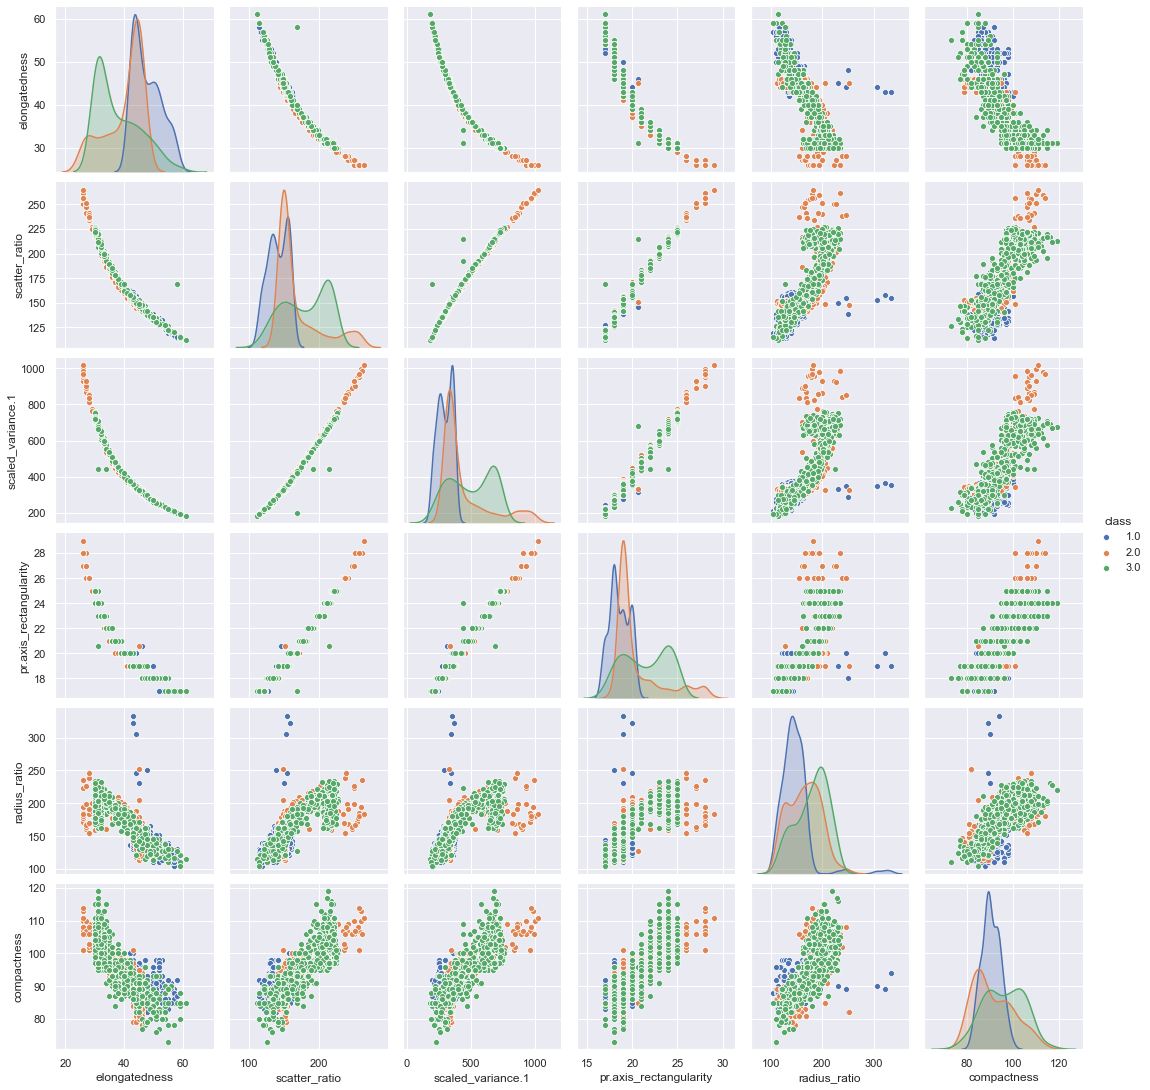

In [20]:
print('Pairplot of Highly correlated variables with the Target variable')
sns.pairplot(df[['elongatedness', 'scatter_ratio', 'scaled_variance.1', 
             'pr.axis_rectangularity', 'radius_ratio', 'compactness', 'class']], hue = 'class')

In [21]:
#Utilities
from time import time
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

In [22]:
# Copying all the predictor variables into X dataframe. Since 'class' is dependent variable drop it
X = df.drop(["class"], axis=1) 

# Copy the 'status' column alone into the y dataframe. This is the dependent variable
y = df[["class"]]

from sklearn.preprocessing import LabelEncoder, StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


## Principal Component Analysis

Principal component Analysis is a method to identify the patterns in data using their similarities and dissimilarities between the sample points. The patterns within data is hard to find especially when we cannot visualize it graphically. The principal component analysis is a powerful tool to explore data with its hidden patterns and reduce the dimensions.

### Steps of principal Component Analysis

1. Normalize all the data variables within same range of values (-1, 1)
2. Compute PCA is to calculate covariance matrix
3. Compute eigenvalues and corresponding eigenvectors
4. Arrange eigenvalues with corresponding eigenvectors in descending order. The higher value eigen vectors have more significance over the data and form principal components whereas the lower value eigen vectors can be removed in order to reduce the dimensions

In [23]:
# Covariance matrix
cov_matrix = np.cov(X_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68623251  0.69065619  0.09181254  0.14842463  0.81319623
  -0.78957587  0.81459888  0.81686705 -0.25036693  0.23596607  0.15757316]
 [ 0.68623251  1.00118343  0.62170187  0.15354334  0.25150523  0.84921058
  -0.82287347  0.84597164  0.83951746  0.05270433  0.14456452 -0.01186527]
 [ 0.69065619  0.62170187  1.00118343  0.6643445   0.45056889  0.73509724
  -0.79072934  0.70912305  0.72100219 -0.1810333   0.04877731  0.17403799]
 [ 0.09181254  0.15354334  0.6643445   1.00118343  0.64947191  0.1038381
  -0.18348087  0.07948935  0.08972584  0.15295712 -0.05855013 -0.0321716 ]
 [ 0.14842463  0.25150523  0.45056889  0.64947191  1.00118343  0.16616348
  -0.18025396  0.16178281  0.14388275  0.29592367  0.01545721  0.04354026]
 [ 0.81319623  0.84921058  0.73509724  0.1038381   0.16616348  1.00118343
  -0.97187169  0.99054075  0.99496023 -0.02801827  0.07439557  0.213379  ]
 [-0.78957587 -0.82287347 -0.79072934 -0.18348087 -0.18025396 -0.97187169
   1.001183

In [24]:
# Eigen values and vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.46458046e-01 -1.36079543e-01  1.04163435e-01  1.69317436e-01
  -2.24013667e-02 -2.10977667e-01  7.34865709e-01  4.61021559e-01
  -1.28445096e-01 -8.83806564e-02 -6.05575936e-03  1.71026779e-03]
 [-3.49128476e-01 -9.82604395e-03 -2.63848039e-01  8.15789436e-02
  -4.65121111e-02 -1.64412159e-01 -5.95257058e-01  6.39097353e-01
  -4.64737012e-02  8.33349559e-02  2.42137711e-02 -8.93823519e-03]
 [-3.38967799e-01  2.51121521e-01  2.95944729e-01  6.29512595e-02
  -1.68553474e-01  2.60568208e-01  3.91438886e-02 -7.96195674e-02
  -2.91403182e-02  7.85856510e-01  8.51908684e-03  8.84471506e-02]
 [-1.07178908e-01  6.27952894e-01  2.46156871e-01  9.33348459e-02
  -1.44378341e-01  4.48608469e-01 -2.66132452e-02  1.95055748e-01
   1.24632045e-01 -4.96096914e-01 -2.53620785e-02 -4.17737094e-02]
 [-1.18027192e-01  5.94377189e-01  4.15414396e-02  6.47507978e-02
   2.08681905e-01 -7.25150763e-01 -1.90678937e-02 -2.37025743e-01
  -6.88924581e-04  3.06162519e-03  1.71925143e-02 -2.4

In [25]:
# Cumulative variance explained
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 51.42889408  67.17529324  76.73947953  85.69960749  92.97837689
  96.04058613  98.0569103   99.33606145  99.67367304  99.88608132
  99.97027218 100.        ]


Text(0, 0.5, 'Eigen Values')

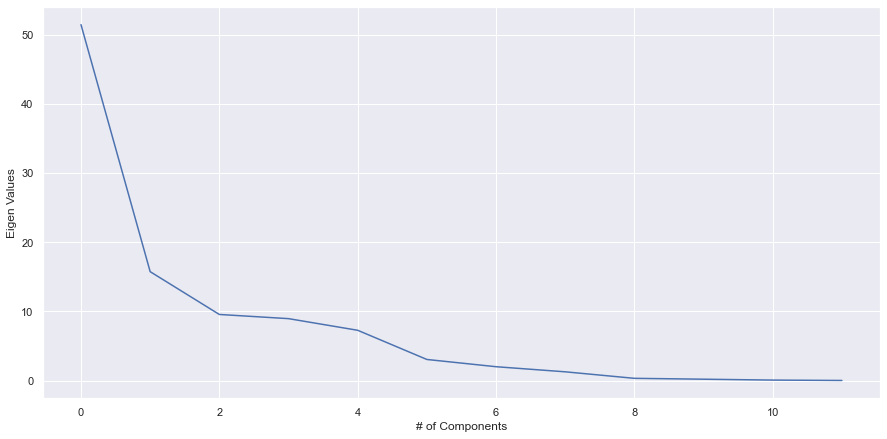

In [44]:
plt.figure(figsize = (15 , 7.2))
plt.plot(var_exp)
plt.xlabel('# of Components')
plt.ylabel('Eigen Values')

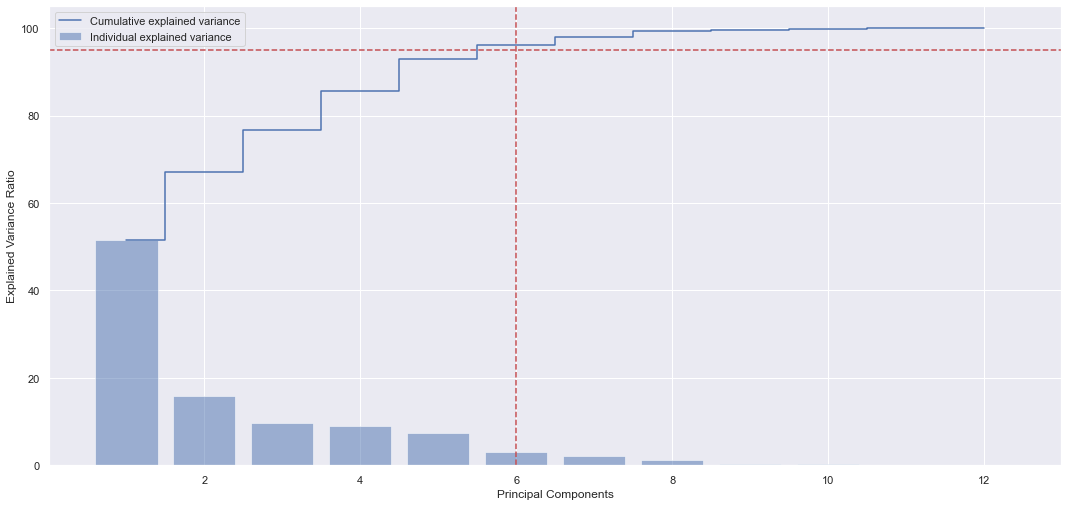

In [27]:
# Ploting 
plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.axvline(x = 6, color = 'r', linestyle = '--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


### Observations
1. Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
2. We will proceed with 6 components here which covers more than 95% of variance.

In [28]:
# Reducing the dimensions from 12 to 6
pca = PCA(n_components = 6, random_state = random_state)
pca.fit(X_scaled)
X_reduced = pca.fit_transform(X_scaled)
display(X_reduced.shape)

(846, 6)

In [29]:
pca.components_

array([[ 0.34645805,  0.34912848,  0.3389678 ,  0.10717891,  0.11802719,
         0.39216673, -0.38888569,  0.38852084,  0.38920911, -0.03035039,
         0.04939736,  0.08330057],
       [-0.13607954, -0.00982604,  0.25112152,  0.62795289,  0.59437719,
        -0.0982663 ,  0.06355203, -0.10879125, -0.10911142,  0.33191942,
        -0.11542747, -0.09891786],
       [-0.10416343,  0.26384804, -0.29594473, -0.24615687, -0.04154144,
         0.10083054, -0.0225847 ,  0.11782   ,  0.11744616,  0.68262478,
        -0.01271174, -0.51491923],
       [ 0.16931744,  0.08157894,  0.06295126,  0.09333485,  0.0647508 ,
        -0.09305405,  0.06978826, -0.09191037, -0.0910152 , -0.22407442,
         0.81056585, -0.45860928],
       [-0.02240137, -0.04651211, -0.16855347, -0.14437834,  0.2086819 ,
         0.01967868,  0.07479097,  0.04202453,  0.01917154,  0.41051549,
         0.52091737,  0.6756766 ],
       [ 0.21097767,  0.16441216, -0.26056821, -0.44860847,  0.72515076,
        -0.03567005,  

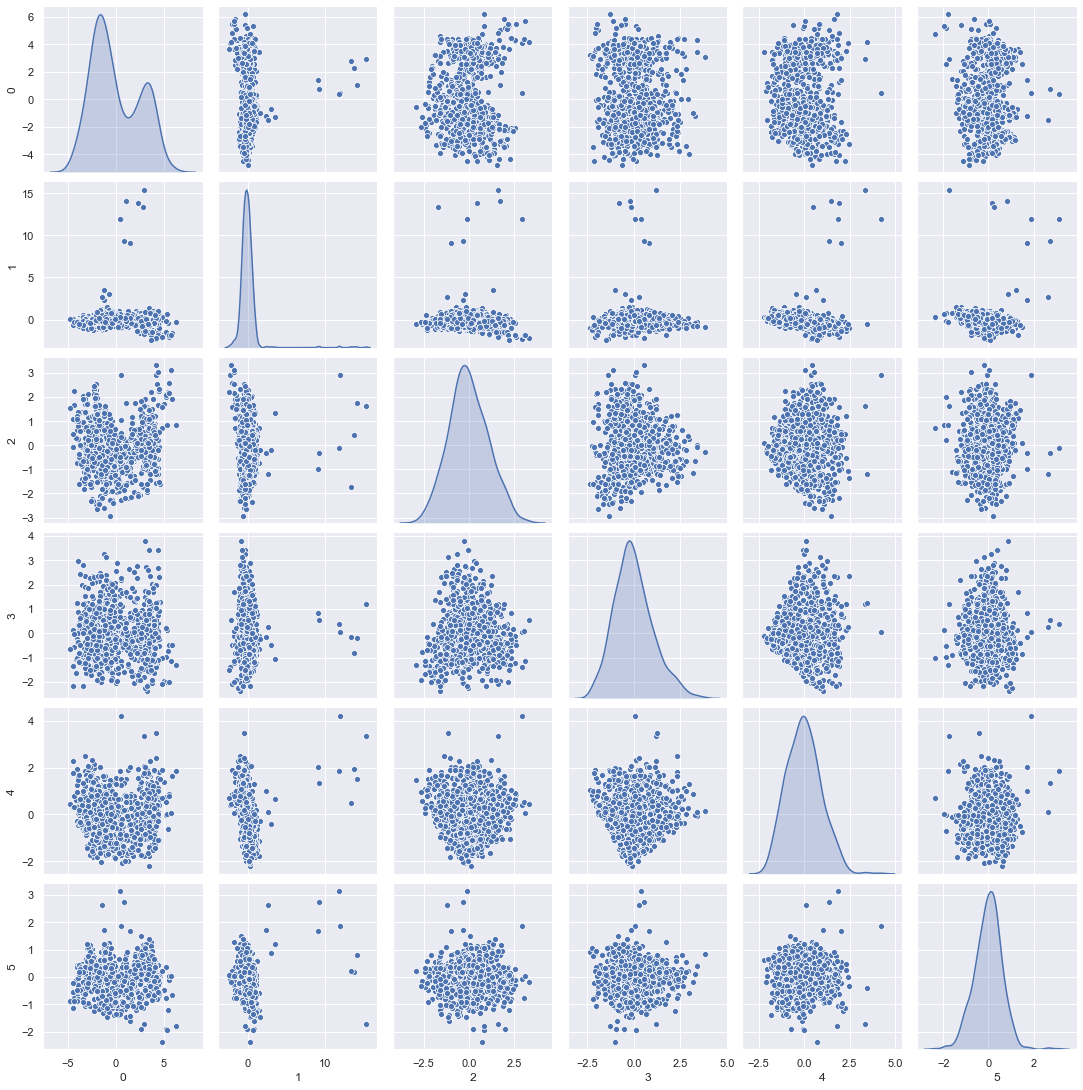

In [30]:
# Pairplot after dimension reduction
sns.pairplot(pd.DataFrame(X_reduced), diag_kind = 'kde')

In [31]:
# Let's create a generic method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, prec_rcl=True):
    timer.start()
    # train the model
    clf = estimator.fit(X_train, y_train)
    # predict from the claffier
    y_pred = clf.predict(X_test)
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train, clf.predict(X_train)) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')
    cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 2,3])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Van","Bus","Car"]],columns = [i for i in ["Predict Van","Predict Bus","Predict Car"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True,fmt='g')
    plt.title('Confusion matrix')
    plt.show()
        
    if prec_rcl:
        print('='*80)
        y_proba = clf.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test,y_pred )
        fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
        plt.figure()
        plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

In [32]:
# Divide the original dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 12), (170, 12), (676, 1), (170, 1))

In [33]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

79.91% data is in training set
20.09% data is in test set


In [34]:
print("Car True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 3]), (len(df.loc[df['class'] == 3])/len(df.index)) * 100))
print("Bus True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 2]), (len(df.loc[df['class'] == 2])/len(df.index)) * 100))
print("Van True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 1]), (len(df.loc[df['class'] == 1])/len(df.index)) * 100))
print("Training Car True Values    : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train['class'] == 3]), (len(y_train.loc[y_train['class'] == 3])/len(y_train)) * 100))
print("Training Bus True Values    : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train['class'] == 2]), (len(y_train.loc[y_train['class'] == 2])/len(y_train)) * 100))
print("Training Van True Values    : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train['class'] == 1]), (len(y_train.loc[y_train['class'] == 1])/len(y_train)) * 100))
print("Test Car True Values        : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test['class'] == 3]), (len(y_test.loc[y_test['class'] == 3])/len(y_test)) * 100))
print("Test Bus True Values        : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test['class'] == 2]), (len(y_test.loc[y_test['class'] == 2])/len(y_test)) * 100))
print("Test Van True Values        : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test['class'] == 1]), (len(y_test.loc[y_test['class'] == 1])/len(y_test)) * 100))


Car True Values    : 429 (50.71%)
Bus True Values    : 218 (25.77%)
Van True Values    : 199 (23.52%)
Training Car True Values    : 339 (50.15%)
Training Bus True Values    : 181 (26.78%)
Training Van True Values    : 156 (23.08%)
Test Car True Values        : 90 (52.94%)
Test Bus True Values        : 37 (21.76%)
Test Van True Values        : 43 (25.29%)


In [35]:
# Divide the projected dataset into train and test split
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=1)
X_reduced_train.shape, X_reduced_test.shape, y_train.shape, y_test.shape

((676, 6), (170, 6), (676, 1), (170, 1))

In [36]:
print("{0:0.2f}% data is in training set".format((len(X_reduced_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_reduced_test)/len(df.index)) * 100))

79.91% data is in training set
20.09% data is in test set


In [37]:
print("Car True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 3]), (len(df.loc[df['class'] == 3])/len(df.index)) * 100))
print("Bus True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 2]), (len(df.loc[df['class'] == 2])/len(df.index)) * 100))
print("Van True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 1]), (len(df.loc[df['class'] == 1])/len(df.index)) * 100))
print("Training Car True Values    : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train['class'] == 3]), (len(y_train.loc[y_train['class'] == 3])/len(y_train)) * 100))
print("Training Bus True Values    : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train['class'] == 2]), (len(y_train.loc[y_train['class'] == 2])/len(y_train)) * 100))
print("Training Van True Values    : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train['class'] == 1]), (len(y_train.loc[y_train['class'] == 1])/len(y_train)) * 100))
print("Test Car True Values        : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test['class'] == 3]), (len(y_test.loc[y_test['class'] == 3])/len(y_test)) * 100))
print("Test Bus True Values        : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test['class'] == 2]), (len(y_test.loc[y_test['class'] == 2])/len(y_test)) * 100))
print("Test Van True Values        : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test['class'] == 1]), (len(y_test.loc[y_test['class'] == 1])/len(y_test)) * 100))


Car True Values    : 429 (50.71%)
Bus True Values    : 218 (25.77%)
Van True Values    : 199 (23.52%)
Training Car True Values    : 339 (50.15%)
Training Bus True Values    : 181 (26.78%)
Training Van True Values    : 156 (23.08%)
Test Car True Values        : 90 (52.94%)
Test Bus True Values        : 37 (21.76%)
Test Van True Values        : 43 (25.29%)


Estimator: SVC(C=1, gamma=1)
Training accuracy: 100.00%
Testing accuracy: 52.94%
Classification report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        43
         2.0       0.00      0.00      0.00        37
         3.0       0.53      1.00      0.69        90

    accuracy                           0.53       170
   macro avg       0.18      0.33      0.23       170
weighted avg       0.28      0.53      0.37       170

Time taken: 0.089020s to run the model


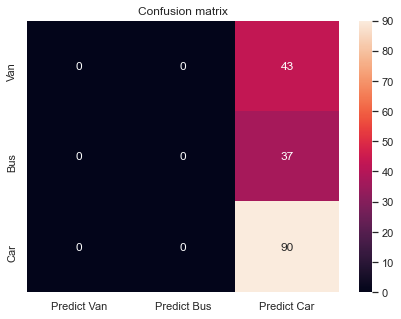

In [38]:
#Run Classification for Support Vector Classifier
run_classification(SVC(C= 1, kernel='rbf', gamma= 1),  X_train, X_test, y_train, y_test,False)

Estimator: SVC(C=1, gamma=1)
Training accuracy: 97.63%
Testing accuracy: 89.41%
Classification report:
               precision    recall  f1-score   support

         1.0       0.93      0.86      0.89        43
         2.0       0.91      0.84      0.87        37
         3.0       0.88      0.93      0.90        90

    accuracy                           0.89       170
   macro avg       0.90      0.88      0.89       170
weighted avg       0.90      0.89      0.89       170

Time taken: 0.025383s to run the model


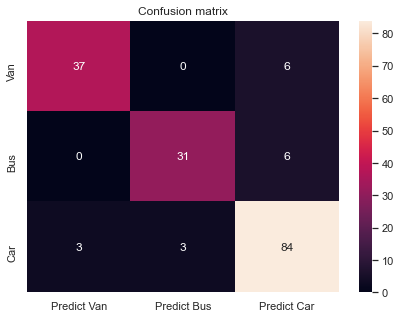

In [39]:
#Run Classification for Support Vector Classifier after PCA
run_classification(SVC(C= 1, kernel='rbf', gamma= 1),  X_reduced_train, X_reduced_test, y_train, y_test,False)

In [40]:
# Run GridSearch to tune the hyper-parameter
st = time()
k_fold_cv = 10 # Stratified 10-fold cross validation
grid_params = [
    { 'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf'] },
    { 'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001] },
    { 'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2,3,4,5,6] }
]
grid = GridSearchCV(SVC(), param_grid=grid_params, cv=k_fold_cv, n_jobs=1, iid=False)
grid.fit(X_reduced_train, y_train)
print('Best hyper parameter:', grid.best_params_)
print('Time taken %.2fs to tune the best hyper-parameter for Support Vector classifier' % (time()-st))

Best hyper parameter: {'C': 1, 'kernel': 'rbf'}
Time taken 14.43s to tune the best hyper-parameter for Support Vector classifier


Estimator: SVC(C=1)
Training accuracy: 92.46%
Testing accuracy: 91.76%
Classification report:
               precision    recall  f1-score   support

         1.0       0.89      0.93      0.91        43
         2.0       0.89      0.89      0.89        37
         3.0       0.94      0.92      0.93        90

    accuracy                           0.92       170
   macro avg       0.91      0.91      0.91       170
weighted avg       0.92      0.92      0.92       170

Time taken: 0.017077s to run the model


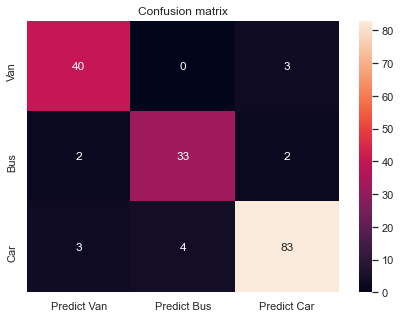

In [41]:
# Use the tuned estimator from GridSearch to run the classification
run_classification(grid.best_estimator_, X_reduced_train, X_reduced_test, y_train, y_test,False)

## Conclusion

Multicolinearity and Curse of Dimensionality are the 2 major phenomenon which adversly impact any machine learning model. With higher degree of multicolinearity, model tend to leave behind the major information that is contained in the mathematical space of the input features. And with Curse of Dimensionality because of the feature space becoming increasingly sparse for an increasing number of dimensions of a fixed-size training dataset, model tend to overfit.

Principal Component Analysis helps adressing these problem and improves the model performance to a great extent as we can see a giant leap in the test score before and after PCA.